# HW 1

In [0]:
import matplotlib.pyplot as plt
import numpy as np

## Task 1

Let's define the model $u(w)=\dfrac{w^\gamma}{\gamma}$

In [0]:
def makeModel(phi):
  return lambda w: pow(w,float(phi))/phi
def getModelResults(phi, start=-100, end=100):
  ws = np.arange(start,end)
  model = makeModel(phi)
  ys = [model(w) for w in ws]
  return (ys, ws)

Plot different models with $0<\gamma<10$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


Text(0.5, 1.0, 'Gamma = 3.5')

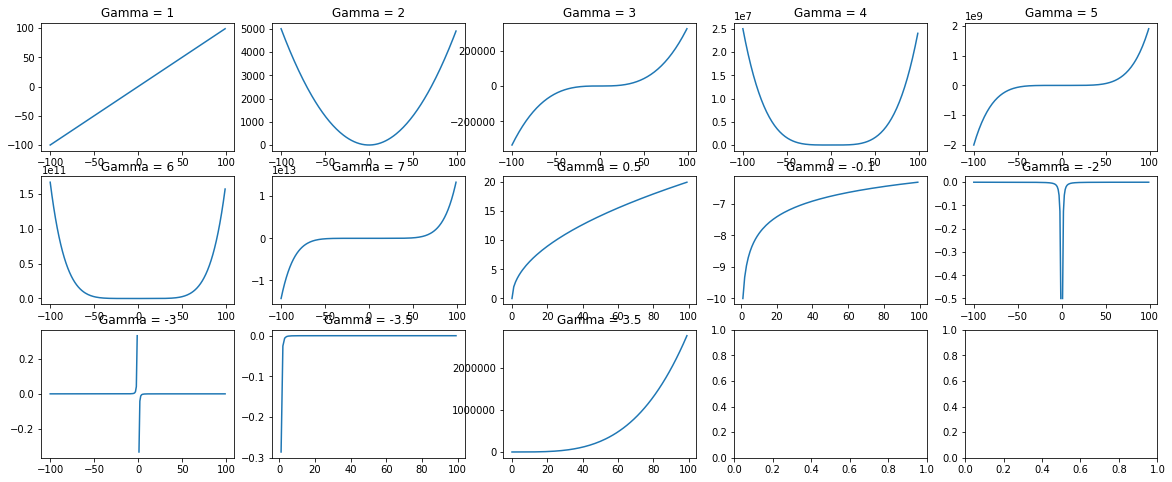

In [0]:
fig, axes = plt.subplots(3,5)
fig.set_size_inches(20, 8)

for i in range(1,8):
  ax = axes[(i-1) //5, (i-1) % 5]
  ys, ws = getModelResults(i)
  ax.plot(ws, ys, '-')
  ax.set_title(f"Gamma = {i}")

i = i + 1
ax = axes[(i-1) //5, (i-1) % 5]
ys, ws = getModelResults(0.5)
ax.plot(ws, ys, '-')
ax.set_title(f"Gamma = {0.5}")


i = i + 1
ax = axes[(i-1) //5, (i-1) % 5]
ys, ws = getModelResults(-0.1)
ax.plot(ws, ys, '-')
ax.set_title(f"Gamma = {-0.1}")

i = i + 1
ax = axes[(i-1) //5, (i-1) % 5]
ys, ws = getModelResults(-2)
ax.plot(ws, ys, '-')
ax.set_title(f"Gamma = {-2}")


i = i + 1
ax = axes[(i-1) //5, (i-1) % 5]
ys, ws = getModelResults(-3)
ax.plot(ws, ys, '-')
ax.set_title(f"Gamma = {-3}")

i = i + 1
ax = axes[(i-1) //5, (i-1) % 5]
ys, ws = getModelResults(-3.5)
ax.plot(ws, ys, '-')
ax.set_title(f"Gamma = {-3.5}")

i = i + 1
ax = axes[(i-1) //5, (i-1) % 5]
ys, ws = getModelResults(3.5)
ax.plot(ws, ys, '-')
ax.set_title(f"Gamma = {3.5}")

From above we see that at even gamma value graph becomes non monotone growing.

Also $\gamma \ne 0$  becouse we devide by $\gamma$

But if $w > 0$ then function $u(w)$ is monotonic growing for all $\gamma$ except 0, of course.

**Answer:**

$\gamma$ is not even number $\bigcup$ $\gamma \ne 0$

But if $w>0$

$\gamma \ne 0$

## Task 21

Model:

$u = x_1^\frac{1}{3} \times x_2^\frac{2}{3}$

Condition

$x_1\times20+x_2\times30=500$

Let's get $x_1$ using $x_2$

$x_1 = \dfrac{(500 - x_2\times30)}{20}$

So new model:

$u = \dfrac{(500 - x_2\times30)}{20}^\frac{1}{3} \times x_2^\frac{2}{3}$

We have to find maximum of new model:

In [0]:
p1 = 20
p2 = 30

w = 500

u = lambda x1,x2: x1**(1/3) * x2**(2/3)
y = lambda x2: ((500-x2*p2)/p1)**(1/3) * x2**(2/3)

In [0]:
xs = np.arange(1,16, step=0.01)
results = []
for x in xs:
  results.append(y(x))
max_x2 = xs[np.argmax(np.array(results))]
max_x1 = (500 - max_x2*p2)/p1

**Answer:**

In [0]:
print(f"x1 = {max_x1}")
print(f"x2 = {max_x2}")
print(f"Total spent = {p1*max_x1 + max_x2*p2} <= 500")
print(f"u = {u(max_x1,max_x2)}")

x1 = 8.334999999999988
x2 = 11.110000000000008
Total spent = 500.0 <= 500
u = 10.095114303678583


## Task 3

In [0]:
W=20
G=44
B=7
p=0.4

u = lambda w: w**(1/3)

### 3.1  Find max price for buying


$u(W) = pu(W  - P_{buy}+G) + (1-p)u(W - P_{buy}+B)$

17.400000000000013

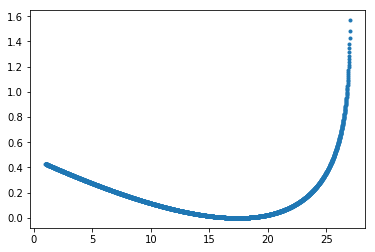

In [0]:
buy_left = u(W)

prices_buy = np.arange(1,W+B,0.01)
distances = []

for Pb in prices_buy:
  distance = (buy_left - p*u(W-Pb+G) - (1-p)*u(W-Pb+B))**2
  distances.append(distance)
  
distances = np.array(distances)
max_price = prices_buy[np.argmin(distances)]
plt.plot(prices_buy, distances, '.')
max_price

### 3.2  Find min price for selling

$u(W - P_{sell}) = pu(W+G) + (1-p)u(W+B)$

19.300000000000015

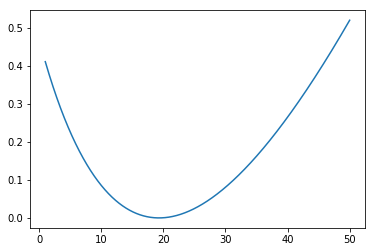

In [0]:
sell_right = p*u(W+G) + (1-p)*u(W+B)

prices_sell = np.arange(1,50,0.01)
distances = []

for Ps in prices_sell:
  distance = (u(W+Ps) - sell_right)**2
  distances.append(distance)
  
min_price = prices_sell[np.argmin(distances)]
plt.plot(prices_sell, distances)
min_price

**Answers:**  17. 4 and 19.3

## Task 4

Text(0, 0.5, 'Sells')

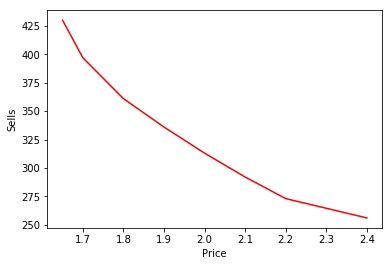

In [0]:
prices = np.array([1.65,1.7,1.8,1.9,2,2.1,2.2,2.4])
sells = np.array([430,397,361,336,313,292,273,256])

plt.plot(prices, sells, 'r')
plt.xlabel('Price')
plt.ylabel('Sells')

$Q=e^{a-b\times p-c\times p^2}$ +d

Above equation is hard to predict using classical least squares. Let's apply $ln(..)$  to both sides.

$ln(Q) = a-bp -cp^2 + ln(d)$

$a + ln(d)$ is the simple intercept. So we can look at it as one variable $a$

This is typical linear regression problem:

Q=exp(9.33522398352963+-2.895795288951223p+0.548361292331037p^2)


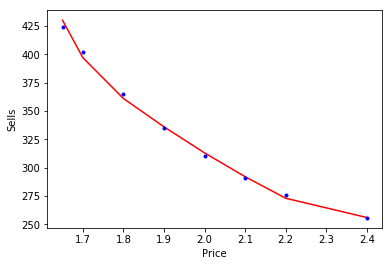

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = np.array([
    prices,
    prices**2,
]).T

lr.fit(X,np.log(sells))
a = lr.intercept_
[b, c] = lr.coef_

print(f"Q=exp({a}+{b}p+{c}p^2)")
plt.plot(prices, sells, 'r')
plt.plot(prices, np.exp(lr.predict(X)), '.', color='b')
plt.xlabel('Price')
plt.ylabel('Sells');

Blue lines show our model prediction

## Task 5

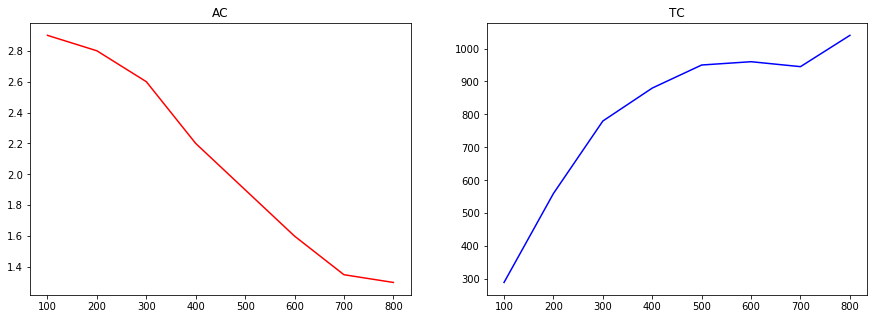

In [0]:
Q = np.array([100,200,300,400,500,600,700,800,])
AC = np.array([2.9,2.8,2.6,2.2,1.9,1.6,1.35,1.3])
TC = np.array([290,560,780,880,950,960,945,1040])

# AC_int = lambda q: a + b*q + c*q**2 + d*q**3
# TC_int = lambda q: a + b*q + c*q**2 + d*q**3 + e*q**4
fig, [ax1, ax2] = plt.subplots(1,2)
fig.set_size_inches(15,5)

ax1.plot(Q, AC, color='r')
ax1.set_title('AC')
ax2.plot(Q, TC, color='b')
ax2.set_title('TC');


In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

X_q = np.array([
    Q,
    Q**2,
    Q**3,
]).T

lr.fit(X_q, AC)
a = lr.intercept_
[b, c, d] = lr.coef_
print("Formula result:")
print(f"AC(Q) = {a} + {b}*Q + {c}*Q^2 + {d}*Q^3")

Formula result:
AC(Q) = 2.7928571428561337 + 0.0023066378066402436*Q + -1.3198051948051739e-05*Q^2 + 9.974747474746605e-09*Q^3


Text(0.5, 1.0, 'AC')

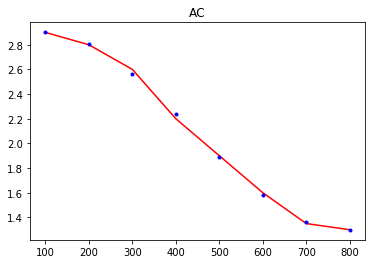

In [0]:
plt.plot(Q, AC, color='r')
plt.plot(Q, lr.predict(X_q), '.',color='b',)
plt.title('AC')

Blue dots shows prediction from out polynomial model. We can see that the prediction is pretty close.

In [0]:
lr = LinearRegression()
X_q = np.array([
    Q,
    Q**2,
    Q**3,
    Q**4,
]).T
lr.fit(X_q, TC)
a = lr.intercept_
[b, c, d, e] = lr.coef_
print("Formula result:")
print(f"TC(Q) = {a} + {b}*Q + {c}*Q^2 + {d}*Q^3 + {e}*Q^4")

Formula result:
TC(Q) = -5.803571252034089 + 2.8934839459498023*Q + 0.001803503788526263*Q^2 + -1.227588383861391e-05*Q^3 + 9.422348484777743e-09*Q^4


Text(0.5, 1.0, 'TC')

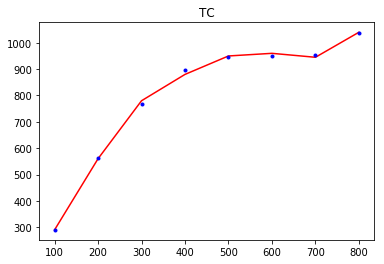

In [0]:
plt.plot(Q, TC, color='r')
plt.plot(Q, lr.predict(X_q), '.',color='b',)
plt.title('TC')

## Task 6

$Profit(Q)=-2,5Q^4+22Q^3-7,25Q^2+90Q-40$

Find $Q$ where $Profit(Q)$ is max.

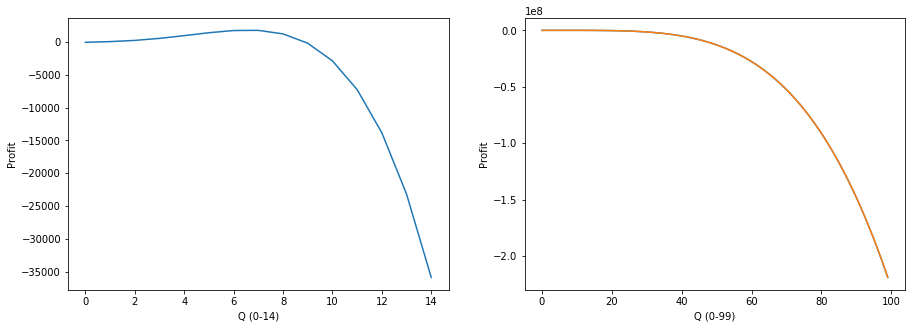

In [0]:
profit = lambda Q: -2.5*(Q**4) + 22*(Q**3) - 7.25*(Q**2) + 90*Q - 40

fig, [ax1, ax2] = plt.subplots(1,2)
fig.set_size_inches(15,5)

X = np.arange(0,15)
y = profit(X)
ax1.plot(X,y)
ax1.set_xlabel("Q (0-14)")
ax1.set_ylabel("Profit")


X = np.arange(0,100)
y = profit(X)
ax2.plot(X,y)
ax2.set_xlabel("Q (0-99)")
ax2.set_ylabel("Profit")
ax2.plot(X,y)

From above graphs we can see that the max profit we got when: $5<Q<8$

Let's find this point:

In [0]:
qs = np.arange(0,20)
profits = []
for q in qs:
  profits.append(profit(q))
profits = np.array(profits)

max_q = qs[np.argmax(profits)]

print(f"Max Profit(Q) => Q={max_q}, Profit(7) = {np.max(profits)}")

Max Profit(Q) => Q=7, Profit(7) = 1778.25


**Answer**: Max Profit(Q) => Q=7, Profit(7) = 1778.25